# Linear Regression with R

Linear regression is a method used to predict the outcome variable Y based on one or more input predictor variables X. The goal is to find the linear relationship between the predictor variable(s) X and the response variable Y.

## Introduction

Here is an example problem that uses the `cars` built-in dataset.

In [1]:
head(cars)

speed,dist
<dbl>,<dbl>
4,2
4,10
7,4
7,22
8,16
9,10


## Graphical Analysis

The aim of this is to create a linear model that can predict the distance by establishing a statistically signifcant linear relationship with speed.
We will be using three different types of visual aids:
1. __Scatter plot__: Visualize the linear relationship between the predictor and response.
2. __Box plot__: To spot any outlier observations in the variable. Having outliers in your predictor can drastically affect the predictions as they can easily affect the direction/slope of the line of best fit.
3. __Density plot__: To see the distribution of the predictor variable. Ideally, a close to normal distribution (a bell shape curve), without being skewed to the left or right is preferred.

### Scatter Plot

Scatter plots can aid in the visualization of linear relationships between the dependent (response) variable and the independent (predictor) variables.

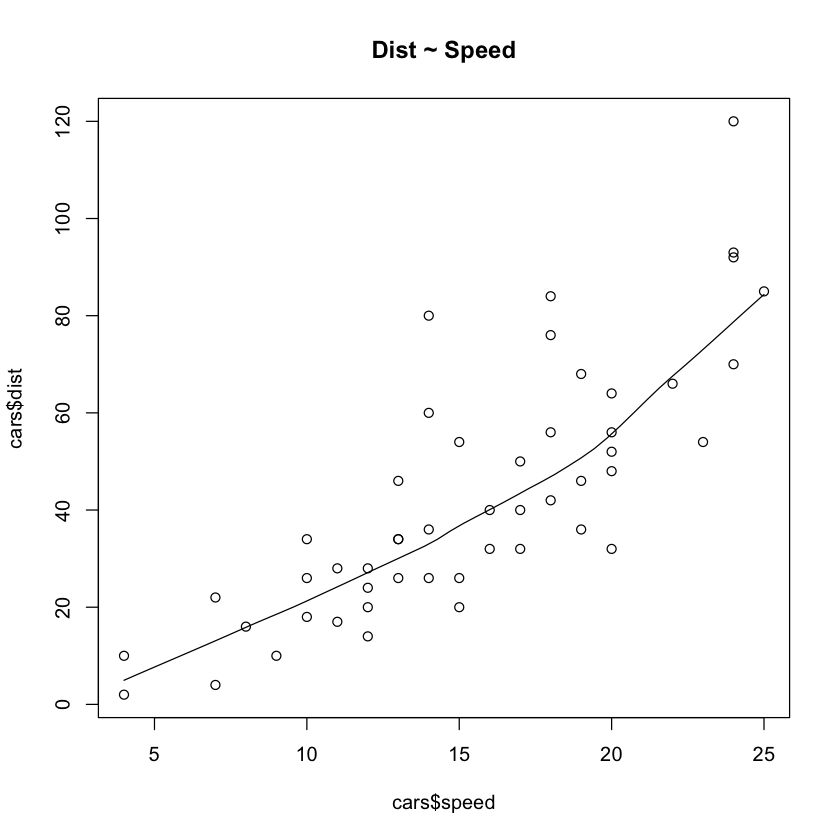

In [2]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")

### BoxPlot - Check for outliers

Generally, any point that lies outside the `1.5 * interquartile-range(1.5 * IQR)` is considered an outlier, where `IQR` is calculated as the distance between the 25th percentile and 75th percentile values for that variable.

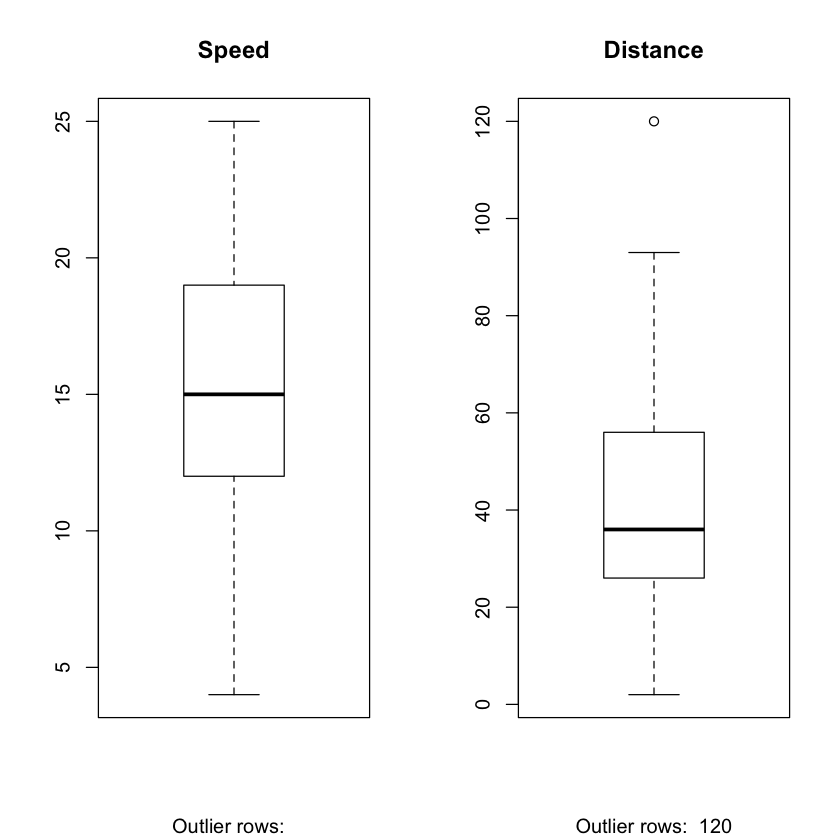

In [3]:
par(mfrow=c(1,2))
boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))
boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))

### Density plot - Check if the response variable is close to normality

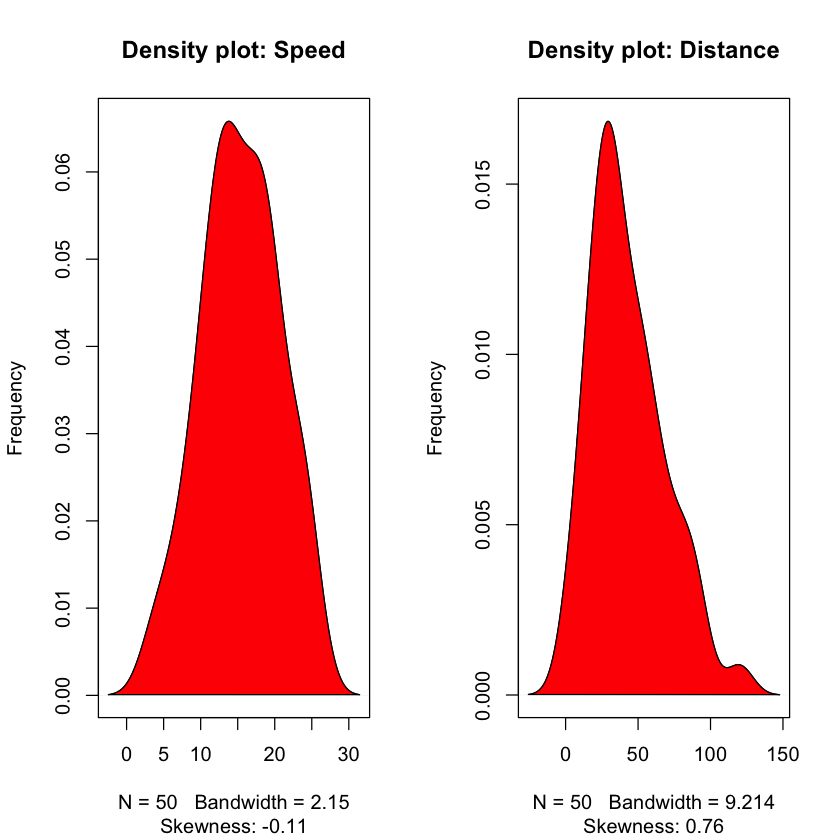

In [4]:
library(e1071)
par(mfrow=c(1,2))
plot(density(cars$speed), main="Density plot: Speed", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$speed), 2)))
polygon(density(cars$speed), col="red")
plot(density(cars$dist), main="Density plot: Distance", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$dist), 2)))
polygon(density(cars$dist), col="red")

## Correlation

Correlation is the measure of linear dependence between two variables. Correlation takes the values of -1 to +1. If the correlation is found to be closer to +1, then there is a positive correlation between the two variables. If the correlation is found to be closer to -1, then there is a negative correlation between the two variables. A value closer to 0 means that there is a weak correlation between the two variables.

In [5]:
cor(cars$speed, cars$dist)

[1] 0.8068949

## Linear Models

To build linear models in R, we use the `lm()` function. The `lm()` function takes two main arguments, namely: (1) Formula, (2) Data. The data is typically a `data.frame` and the formula is an object of class `formula`. The most common convention is to write out the formula directly in place of the argument.

In [6]:
linearMod <- lm(dist ~ speed, data=cars)
print(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



As can be viewed the output discribes the linear relationship between the two variables as two components:
1. The `Intercept`
2. The `speed`
These are called the beta coefficients and satisfy the formula:
`dist = Intercept + beta * speed`

## Linear Regression Diagnostics

Now that we have a linear model we need to see if it is statistically significant.

In [7]:
summary(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


## The p Value: Checking for Statistical significance

We can consider a linear model to be statistically significant only when both the `p-value` of the model and the `p-value` of the individual predictor variables are less than than the pre-determined statistical significance level, which is ideally 0.05. This is visually interpreted by the significance stars at the end of the row. The more the stars beside the variable's p-Value, the more significant the variable.

### Null and alternate hypothesis

When there is a p-value, there is a hull and alternative hypothesis associated with it. In linear regression, the Null hypothesis is that the coefficients associated with the variables is equal to zero. The alternate hypothesis is equal to zero  (i.e. there exists a relationship between the independent variable in question and the dependent variable).

### t-value

We can interpret the t-value something like this. A larger t-value indicates that it is less likely that the coefficient is not equal to zero purely by chance. So, higher the t-value, th ebetter.

`Pr(>|t|)` or `p-value` is the probability that you get a t-value as high or higher than the observed value when the Null Hypothesis (the `beta` coefficient is equal to zero or that there is no relationship) is true. So if the `Pr(>|t|)` is low, the coefficients are significant (significantly different from zero). If the `Pr(>|t|)` is high 